In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import random
import pandas as pd

!pip install librosa
import librosa

In [0]:

mnist_data = input_data.read_data_sets('MNIST_data', one_hot=True)
# mnist_train_x, mnist_test_x = mnist_train_x/255.0, mnist_test_x/255.0

# print(type(mnist_data.train))

In [0]:
# print(mnist_data.validation)
n_train = mnist_data.train.num_examples # 55,000
n_test = mnist_data.test.num_examples # 10,000

**Neural Network  structure**


*   For the MNIST image classification problem a simpe fully connected neural network is built with the following:
* 5 hidden layers with 1024 hidden-units. 
* Input size is 784 (28x28 pixels)
* Output has 10 nodes
* Relu activation layers after each layer
* Softmax activation for the last layer





In [0]:
n_input = 784   # input layer (28x28 pixels)
n_hidden1 = 1024 # 1st hidden layer
n_hidden2 = 1024 # 2nd hidden layer
n_hidden3 = 1024 # 3rd hidden layer
n_hidden4 = 1024 # 4th hidden layer
n_hidden5 = 1024 # 5th hidden layer
n_output = 10   # output layer (0-9 digits)

In [0]:
# Setting learning rate to 0.0001
lr = 1e-4
n_iterations = 1000
batch_size = 512
dropout = 0.5

**Initialization**


1.   X,Y are initialized with size compatible with the images (784 input and output units)
2.   Weights are initialized using He-initialization with a random normal distribution with standard deviation of $ sqrt(2/n\_input) $ where n_input is number of input units to the respective layer
3. Biases are set to $0$ with the shape of input units





In [0]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
training = tf.placeholder_with_default(False, shape=(), name='training')
keep_prob = tf.placeholder(tf.float32) 

weights = {
    'w1': tf.Variable(tf.random_normal([n_input, n_hidden1], stddev=np.sqrt(2/n_input))),
    'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2], stddev=np.sqrt(2/n_hidden1))),
    'w3': tf.Variable(tf.random_normal([n_hidden2, n_hidden3], stddev=np.sqrt(2/n_hidden2))),
    'w4': tf.Variable(tf.random_normal([n_hidden3, n_hidden4], stddev=np.sqrt(2/n_hidden3))),
    'w5': tf.Variable(tf.random_normal([n_hidden4, n_hidden5], stddev=np.sqrt(2/n_hidden4))),
    'out': tf.Variable(tf.random_normal([n_hidden5, n_output], stddev=np.sqrt(2/n_hidden5))),
}

biases = {
    'b1': tf.Variable(tf.constant(0.0, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.0, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.0, shape=[n_hidden3])),
    'b4': tf.Variable(tf.constant(0.0, shape=[n_hidden4])),
    'b5': tf.Variable(tf.constant(0.0, shape=[n_hidden5])),
    'out': tf.Variable(tf.constant(0.0, shape=[n_output]))
}

**Stacking up layers**

In [0]:
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
# layer_1 = tf.layers.batch_normalization(layer_1, training=training, momentum=0.9)
layer_1 = tf.nn.relu(layer_1)
layer_drop = tf.nn.dropout(layer_1, keep_prob)
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
# layer_2 = tf.layers.batch_normalization(layer_2, training=training, momentum=0.9)
# output_layer = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_2 = tf.nn.relu(layer_2)
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
# layer_3 = tf.layers.batch_normalization(layer_3, training=training, momentum=0.9)
layer_3 = tf.nn.relu(layer_3)
layer_4 = tf.add(tf.matmul(layer_3, weights['w4']), biases['b4'])
# layer_4 = tf.layers.batch_normalization(layer_4, training=training, momentum=0.9)
layer_4 = tf.nn.relu(layer_4)
layer_5 = tf.add(tf.matmul(layer_4, weights['w5']), biases['b5'])
# layer_5 = tf.layers.batch_normalization(layer_5, training=training, momentum=0.9)
# 
layer_5 = tf.nn.relu(layer_5)
output_layer = tf.matmul(layer_5, weights['out']) + biases['out']
# output_layer = tf.nn.softmax(output_layer)


In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=output_layer))
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

**Initializing tensorflow session**

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [64]:
# is_train = tf.placeholder(tf.bool, name="is_train");

for i in range(n_iterations):
    batch_x, batch_y = mnist_data.train.next_batch(batch_size)
#     print(type(batch_x))
#     x_norm = tf.layers.batch_normalization(batch_x, training=is_train)
#     y_norm = tf.layers.batch_normalization(batch_y, training=is_train)
    sess.run(train_step, feed_dict={X: batch_x, Y: batch_y, keep_prob:dropout})

    # print loss and accuracy (per minibatch)
    if i%100==0:
        minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob:1.0})
        print("Iteration", str(i), "\t| Loss =", str(minibatch_loss), "\t| Accuracy =", str(minibatch_accuracy))

Iteration 0 	| Loss = 2.193633 	| Accuracy = 0.2109375
Iteration 100 	| Loss = 0.14663234 	| Accuracy = 0.9628906
Iteration 200 	| Loss = 0.0869498 	| Accuracy = 0.9746094
Iteration 300 	| Loss = 0.052248426 	| Accuracy = 0.9863281
Iteration 400 	| Loss = 0.0674746 	| Accuracy = 0.98046875
Iteration 500 	| Loss = 0.047425617 	| Accuracy = 0.98828125
Iteration 600 	| Loss = 0.027879544 	| Accuracy = 0.9941406
Iteration 700 	| Loss = 0.018359596 	| Accuracy = 0.9902344
Iteration 800 	| Loss = 0.005276429 	| Accuracy = 1.0
Iteration 900 	| Loss = 0.00562671 	| Accuracy = 0.9980469


In [58]:
test_accuracy = sess.run(accuracy, feed_dict={X: mnist_data.test.images, Y: mnist_data.test.labels, keep_prob:1.0})
print("\nAccuracy on test set:", test_accuracy)


Accuracy on test set: 0.9806


**Test data set accuracy : $98.06$**

**Feed forward output layer**:

*   Select 1000 images from test data set
*   Do a feedforward step for the neural netrwork with test samples.
*   Using the pretrained weights predict the probabilities of each sample.
*   Now we have an array of 1000x10 with each sample having a corresponding vector of length 10 with
probabilities of the sample being each of the digit.
* Now for each digit sort the array to extract the top 10 samples based on the probability of sample being respective digit.
* Plot 10x10 grid with samples extracted in the previous step. This gives us with each row having images with corresponding digits.





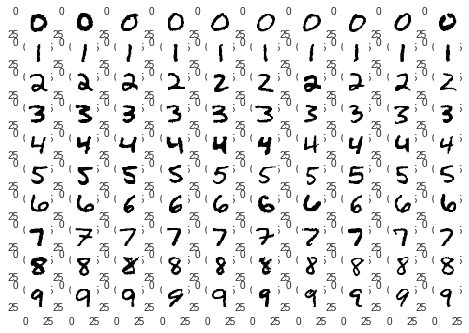

In [65]:
#3 
# Select first 1000 images in test dataset

n_test_batch = 1000
test_batch = mnist_data.test.images[0:n_test_batch]
pred_arr = np.empty([n_test_batch,11], dtype=float)
for j in range(n_test_batch):

  img = test_batch[j]
#   prediction = sess.run(tf.argmax(output_layer,1), feed_dict={X: [img]})
#   print ("Prediction for test image:",prediction)
  pred = sess.run(output_layer, feed_dict={X: [img]})
  pred_arr[j,0:10] = pred[0]
  pred_arr[j,10] = int(j)
# print(pred_arr)
fig = plt.figure()

def plot_test(pred_arr):
  for i in range(10):
    pred_max = pred_arr[pred_arr[:,i].argsort()[::-1]][0:10,10]
    for j in range(10):
      plt.subplot(10, 10, 10*i+j+1)
      curr_img = mnist_data.test.images[int(pred_max[j])].reshape((28,28))
      plt.imshow(curr_img)
#   plt.title('Output layer feedforward top 10 samples based on predicted probabilities')
    
plot_test(pred_arr)

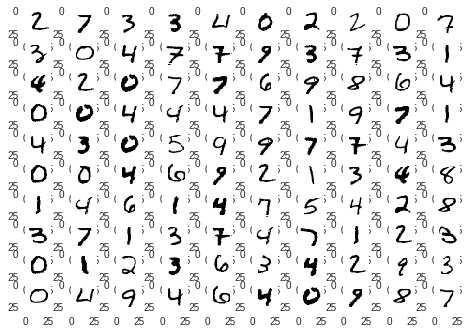

In [66]:
# For other layers
n_test_batch = 100
test_batch = mnist_data.test.images[0:n_test_batch]
pred_arr = np.empty([n_test_batch,1024], dtype=float)
pred_dict = []
# for l in range(2, 6):
for j in range(n_test_batch):

  img = test_batch[j]
#   prediction = sess.run(tf.argmax(output_layer,1), feed_dict={X: [img]})
  pred = sess.run(layer_5, feed_dict={X: [img]})
  pred_arr[j,0:10] =  np.random.choice(pred[0],10)
  pred_arr[j,10] = int(j)
pred_dict = pred_arr
#   pred_dict[l] = pred_arr


def plot_test(pred_arr):
  for i in range(10):
    pred_max = pred_arr[pred_arr[:,i].argsort()[::-1]][0:10,10]
    for j in range(10):
      plt.subplot(10, 10, 10*i+j+1)
      curr_img = mnist_data.test.images[int(pred_max[j])].reshape((28,28))
      plt.imshow(curr_img)

def plot_test_layers(pred):
#   for key, value in pred_dict.items(): 
  fig = plt.figure()
#     print("Predictions for layer ", key)
  plot_test(pred)

plot_test_layers(pred_dict)

**Observation**


*   For the output layer since we have corresponding digits we get to see each row having same digit in order that if the model is well trained.
*   But here in this case, the second-last layer has 1024 output nodes and we randomly select 10 out of these and then correspond each of them to a digit 0-9.
*   This will cause all the digits to be randomly distributed based on the model as seen.
*   Each layer is supposed to extract features from the images to be abe to classify data in the end.
*   If there is way to map each digit to a set of neurons and use these relations to guess the output, then the result would be more appropriate.



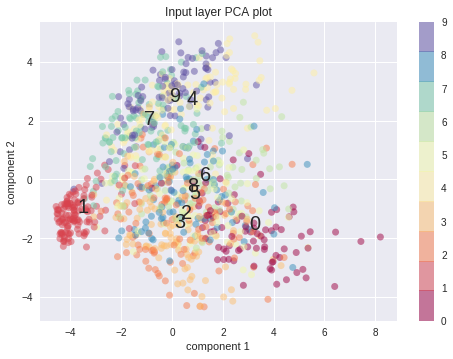

In [67]:
x_test = mnist_data.test.images[0:1000]
y_test = np.argmax(mnist_data.test.labels[0:1000],axis=1)

def plot_pca(x,y, layer):
  title = layer + ' layer PCA plot'
  pca = PCA(n_components=2)
  pca_result = pca.fit_transform(x)
  pca_mean = []
  for i in range(0,10):
    x_idx = np.where(y == i)
    x_mean = np.mean(pca_result[x_idx, 0])
    y_mean = np.mean(pca_result[x_idx, 1])
    pca_mean.append([x_mean, y_mean])
  plt.scatter(pca_result[:, 0], pca_result[:, 1],
              c=y, edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('Spectral', 10))
  font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
  for idx,c in enumerate(pca_mean):
    plt.text(c[0], c[1], str(idx), fontsize=20)
  plt.xlabel('component 1')
  plt.ylabel('component 2')
  plt.title(title)
  plt.colorbar();

plot_pca(x_test, y_test,'Input')

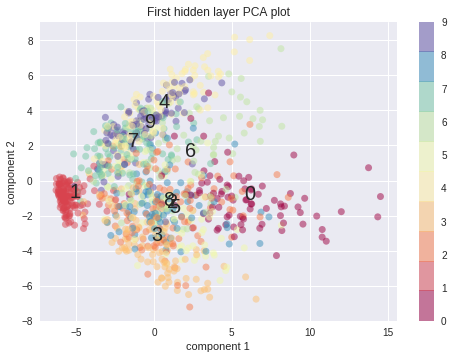

In [68]:
pred_2 = sess.run(layer_2, feed_dict={X: x_test})
pred_3 = sess.run(layer_3, feed_dict={X: x_test})
pred_4 = sess.run(layer_4, feed_dict={X: x_test})
pred_5 = sess.run(layer_5, feed_dict={X: x_test})
pred_5 = sess.run(layer_5, feed_dict={X: x_test})
out = sess.run(output_layer, feed_dict={X: x_test})
plot_pca(pred_2,y_test, 'First hidden')


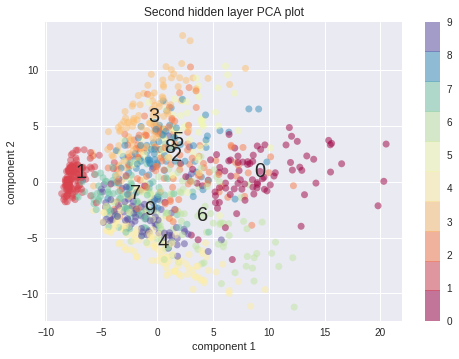

In [69]:
plot_pca(pred_3,y_test, 'Second hidden')

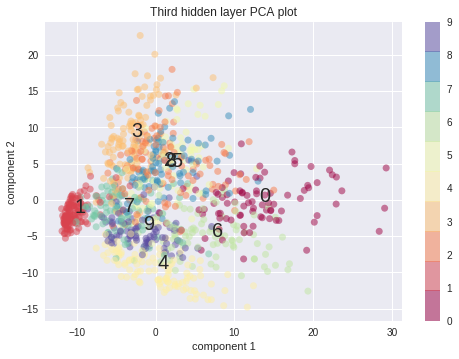

In [71]:

plot_pca(pred_4,y_test, 'Third hidden')

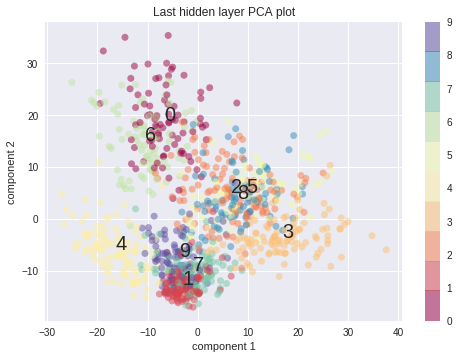

In [72]:

plot_pca(pred_5,y_test, 'Last hidden')

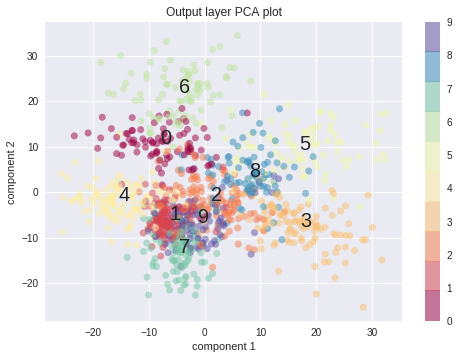

In [73]:
plot_pca(out,y_test, 'Output')

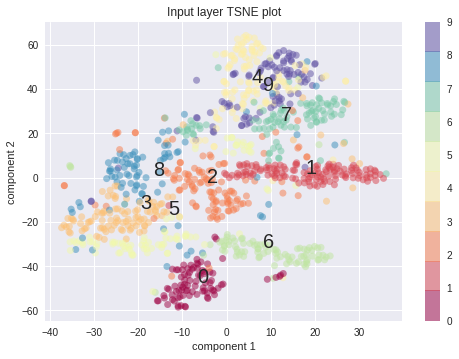

In [74]:

def plot_tsne(x,y, layer):
  title = layer + ' layer TSNE plot'
  tsne = TSNE(n_components=2)
  tsne_result = tsne.fit_transform(x)
  tsne_mean = []
  for i in range(0,10):
    x_idx = np.where(y == i)
    x_mean = np.mean(tsne_result[x_idx, 0])
    y_mean = np.mean(tsne_result[x_idx, 1])
    tsne_mean.append([x_mean, y_mean])
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
              c=y, edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('Spectral', 10))
  for idx,c in enumerate(tsne_mean):
    plt.text(c[0], c[1], str(idx), fontsize=20)
  plt.xlabel('component 1')
  plt.ylabel('component 2')
  plt.title(title)
  plt.colorbar();
  
  
plot_tsne(x_test, y_test, 'Input')

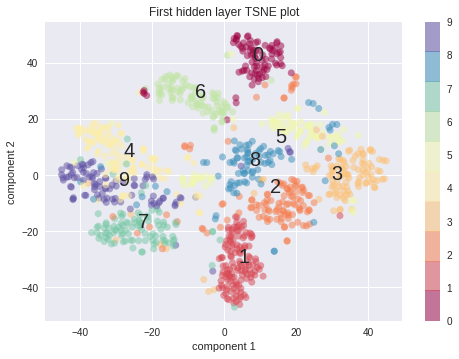

In [75]:
plot_tsne(pred_2,y_test, 'First hidden')

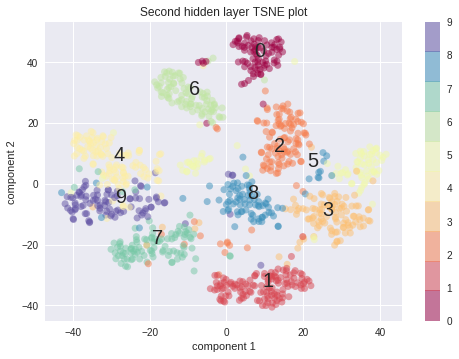

In [76]:
plot_tsne(pred_3,y_test, 'Second hidden')

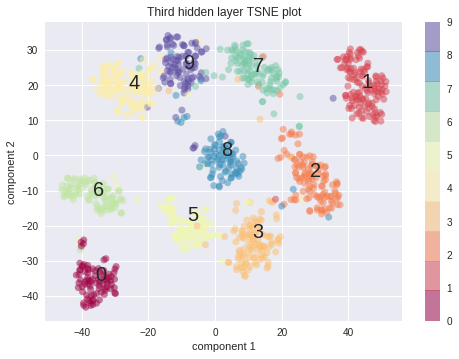

In [77]:
plot_tsne(pred_4,y_test, 'Third hidden')

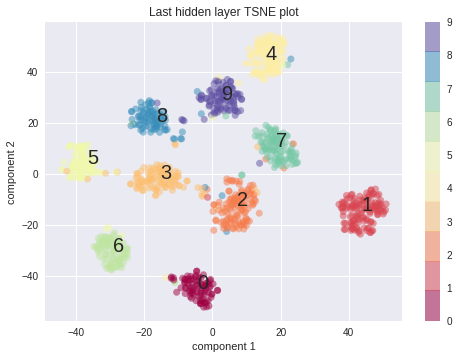

In [78]:
plot_tsne(pred_5,y_test, 'Last hidden')

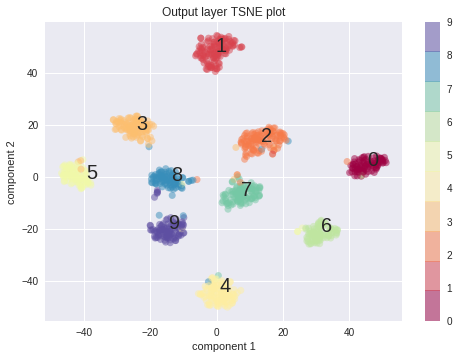

In [79]:
plot_tsne(out,y_test, 'Output')

**PCA and TSNE**

* PCA and TSNE are useful in reducing the dimensions of the data and visualize how scattered they are.
* As we have 10 classes in here, the input pca and tsne plots are scattered everywhere which means differentiating 10 classes at this level is difficult to handle.
* But as we perform feed forward sted for the test data and move layer by layer, it looks better.
* As we can see there is a clear distinction among all the classes in TSNE plots, by the time we reach output layer each digit samples are clustered at different points.
* This means that at each layer the features extracted are efficient and in turn makes the classification easier.
* But PCA plots are not as clear as TSNE but the output pca plot looks way better than the initial one.

**Question 2**

In [0]:
# Extract audio signals and apply stft

s, sr=librosa.load('train_clean_male.wav', sr=None)
S_sgn=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('train_dirty_male.wav', sr=None)
X_sgn=librosa.stft(sn, n_fft=1024, hop_length=512)

In [0]:
# Get the absolute values from the stft out to eliminate complex values
# Transpose the matrix to align the input to neural network

S_sgn = np.abs(S_sgn.T)
X_sgn = np.abs(X_sgn.T)
# print(X_sgn.shape)

**Neural Network  structure**


*   For the audio processing problem a fully connected neural network is built with the following:
* 3 hidden layers with 1024 hidden-units. 
* Input size is 513
* Output has 513 units
* Relu activation layers after each layer - To make sure there are no negative values yielded in the process

**Parameter Initialization**
* Learning rate : 0.001
* Batch Size : 512
* Weights are initialized using He-initialization using truncated normal distribution with a standard deviation of $sqrt(2/n\_input)$
* Bias values are initialized with $0.1$
* Mean Squared Error is takes as Cost function because of the signal structure.

In [0]:


n_input = 513   # input layer (28x28 pixels)
n_hidden1 = 1024 # 1st hidden layer
n_hidden2 = 1024 # 2nd hidden layer
n_hidden3 = 1024 # 3rd hidden layer
n_output = 513   # output layer (0-9 digits)

# Learning rate set to 0.001
lr = 1e-3
n_iterations = 1000
batch_size = 512
dropout = 0.5

X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
keep_prob = tf.placeholder(tf.float32) 

# He- Weight initialization for better performance as we use relu activations
weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=np.sqrt(2/n_input))),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=np.sqrt(2/n_hidden1))),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=np.sqrt(2/n_hidden2))),
    'out': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=np.sqrt(2/n_hidden3))),
}

biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weights['w1']), biases['b1']))
# layer_drop = tf.nn.dropout(layer_1, keep_prob)
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['w2']), biases['b2']))
layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['w3']), biases['b3']))
output_layer = tf.nn.relu(tf.matmul(layer_3, weights['out']) + biases['out'])

# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=output_layer))
loss=tf.losses.mean_squared_error(labels=Y, predictions=output_layer)
train_step = tf.train.AdamOptimizer(lr).minimize(loss)

correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

**Training**
* The input is taken as mini batches.
* For each iteration a sample of batch size is randomly chosen and passed on to training step.

In [0]:
for i in range(n_iterations):
    idx = random.randint(0,20)
    batch_y = X_sgn[idx*batch_size:idx*batch_size + batch_size,:]
    batch_x = S_sgn[idx*batch_size:idx*batch_size + batch_size,:]
    sess.run(train_step, feed_dict={X: X_sgn, Y: S_sgn})
#     print("iteration :", i)
    # print loss and accuracy (per minibatch)
#     if i%100==0:
#         minibatch_loss, minibatch_accuracy = sess.run([loss, accuracy], feed_dict={X: X_sgn, Y: S_sgn, keep_prob:1.0})
#         print("Iteration", str(i), "\t| Loss =", str(minibatch_loss), "\t| Accuracy =", str(minibatch_accuracy))

In [0]:
# Method to refine test audio files
def process_test(file, out):

  test, sr = librosa.load(file, sr=None)
  test_sgn = librosa.stft(test, n_fft=1024, hop_length=512)
  test_s = np.abs(test_sgn)

  pred = sess.run(output_layer, feed_dict={X: test_s.T})
  pred = np.multiply(np.divide(test_sgn,test_s),pred.T)

  sh_test = librosa.istft(pred, hop_length=512)
  if(out == 1):
    outfile = 'test_s_01_recons.wav'
  else:
    outfile = 'test_s_02_recons.wav'
  librosa.output.write_wav(outfile, sh_test, sr)

In [0]:
process_test('test_x_01.wav',1)
process_test('test_x_02.wav',2)